<a href="https://colab.research.google.com/github/satyamgipu/Iplt20analysis/blob/master/Copy_of_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [2]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path="/content/drive/My Drive/"
teams=pd.read_csv(path+"teams.csv")
match=pd.read_csv(path+"matches.csv")
Players=pd.read_excel(path+"Players.xlsx")
deliveries=pd.read_csv(path+"deliveries.csv")
teamwise_home_and_away=pd.read_csv(path+"teamwise_home_and_away.csv")
teams=pd.read_csv(path+"teams.csv")
most_runs_average_strikerate=pd.read_csv(path+"most_runs_average_strikerate.csv")



TOSS Vs winners

In [5]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB


In [6]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


In [7]:
most_runs_average_strikerate.head(1)

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351


In [8]:
teamwise_home_and_away.head(1)

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.5,62.5


In [9]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
Players.head(1)

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India


In [11]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [12]:
match.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [13]:
match_id_with_no_result=list(match[match["result"]=="no result"].id)
match_id_with_no_result

[301, 546, 571, 11340]

In [14]:
match=match[~match["id"].isin(match_id_with_no_result)]
deliveries=deliveries[~deliveries["match_id"].isin(match_id_with_no_result)]

In [15]:
match[match["id"]==546]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [16]:
def inning_finder(winner,toss_decision,toss_winner):
  """ function return in which inning  a team wins the match""" 
  innings_winner=0
  if toss_winner==winner and toss_decision=="field":
    innings_winner=2
  elif toss_winner==winner and toss_decision=="bat":
    innings_winner=1
  elif toss_winner!=winner and toss_decision=="bat":
    innings_winner=2
  elif toss_winner!=winner and toss_decision=="field":
    innings_winner=1
  return innings_winner
match["innings_winner"]=match.apply(lambda x: inning_finder(x["winner"],x["toss_decision"],x["toss_winner"]),
                                                                                axis=1)

In [17]:
inning_wise_percentage=match[["team1","team2","innings_winner","winner"]].value_counts("innings_winner")/match.shape[0]
first_inning_percentage_win=inning_wise_percentage.iloc[0]
second_inning_percentage_win=inning_wise_percentage.iloc[1]


In [18]:
print(first_inning_percentage_win)
second_inning_percentage_win

0.5545212765957447


0.4454787234042553

Text(0.5, 1.0, 'inning_wise_winning_percentage')

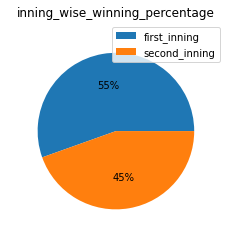

In [185]:
plt.pie([first_inning_percentage_win,second_inning_percentage_win],autopct='%1.0f%%',radius=0.9)
plt.legend(["first_inning","second_inning"])
plt.title("inning_wise_winning_percentage")

In [73]:
inning_wise_extra_runs=pd.DataFrame(deliveries.groupby(["match_id","inning"]).agg({"extra_runs":"sum"}))


In [74]:
inning_wise_extra_runs.shape

(1522, 1)

In [75]:
inning_wise_extra_runs=inning_wise_extra_runs.reset_index()

In [76]:
inning_wise_extra_runs.drop(inning_wise_extra_runs[inning_wise_extra_runs["inning"]>2].index,inplace=True )

In [77]:
inning_wise_extra_runs

,match_id,inning,extra_runs
0,1,1,7
1,1,2,6
2,2,1,8
3,2,2,4
4,3,1,4
...,...,...,...
1517,11413,2,5
1518,11414,1,8
1519,11414,2,11
1520,11415,1,3


In [78]:
def inning_wise_wins(x,temp=match):
 """ function return the wins or loose of the match based on the index and the inning with the help of match dataframe which is set as default """
 if int(match.loc[match["id"]==x["match_id"]]["innings_winner"])==x["inning"]:
     return "wins"
 else:
     return "Loose"
inning_wise_extra_runs["win_Loose"]=inning_wise_extra_runs.apply(lambda x: inning_wise_wins(x),axis=1)

In [79]:
inning_wise_extra_runs

,match_id,inning,extra_runs,win_Loose
0,1,1,7,wins
1,1,2,6,Loose
2,2,1,8,Loose
3,2,2,4,wins
4,3,1,4,Loose
...,...,...,...,...
1517,11413,2,5,wins
1518,11414,1,8,Loose
1519,11414,2,11,wins
1520,11415,1,3,wins


In [80]:
inning_wise_extra_runs.reset_index(inplace=True)

In [81]:
inning_wise_extra_runs.shape

(1504, 5)

In [82]:
MoreXtrarunswins=0
lessXtrarunsLoose=0
independentxtraruns=0

""" code to count wins when extra runs is greater or lesser or equal"""
for i in range(0,inning_wise_extra_runs.shape[0],2):
   if (inning_wise_extra_runs.iloc[i]["extra_runs"]>inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i]["win_Loose"]=="wins":
     MoreXtrarunswins+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]<inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i+1]["win_Loose"]=="wins":
     MoreXtrarunswins+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]>inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i]["win_Loose"]=="Loose":
     lessXtrarunsLoose+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]<inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i+1]["win_Loose"]=="Loose":
     lessXtrarunsLoose+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]==inning_wise_extra_runs.iloc[i+1]["extra_runs"]):
      independentxtraruns+=1
print(MoreXtrarunswins)
print(lessXtrarunsLoose)
print(independentxtraruns)
   


353
335
64


In [83]:
win_Count=(inning_wise_extra_runs.shape[0])//2
win_Count

752

In [84]:
XtrarunsWinsPercentage=(MoreXtrarunswins/win_Count)*100
XtrarunsWinsPercentage

46.941489361702125

In [85]:
XtrarunsLoosePercentage=(lessXtrarunsLoose/win_Count)*100
XtrarunsLoosePercentage

44.547872340425535

In [86]:
independentxtrarunspercentage=(independentxtraruns/win_Count)*100
independentxtrarunspercentage

8.51063829787234

Text(0.5, 1.0, 'Winning percentage based on extra runs')

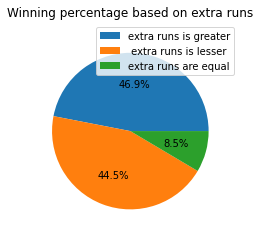

In [184]:

plt.pie([XtrarunsWinsPercentage,XtrarunsLoosePercentage,independentxtrarunspercentage],autopct='%1.01f%%',radius=0.9)
plt.legend(["extra runs is greater"," extra runs is lesser","extra runs are equal"],loc=1)
plt.title("Winning percentage based on extra runs")


In [89]:
total_runs_bowler=pd.DataFrame(deliveries.groupby(["match_id","bowler"]).agg({"total_runs":"sum"}))
total_runs_bowler

total_runs
match_id bowler                    
1        A Choudhary             55
         A Nehra                 42
         B Kumar                 28
         BCJ Cutting             35
         Bipul Sharma             4
...                             ...
11415    MJ McClenaghan          26
         RA Jadeja               12
         RD Chahar               14
         SL Malinga              50
         SN Thakur               37

[8948 rows x 1 columns]

In [90]:
total_runs_bowler.reset_index(inplace=True)

In [91]:
total_runs_bowler

,match_id,bowler,total_runs
0,1,A Choudhary,55
1,1,A Nehra,42
2,1,B Kumar,28
3,1,BCJ Cutting,35
4,1,Bipul Sharma,4
...,...,...,...
8943,11415,MJ McClenaghan,26
8944,11415,RA Jadeja,12
8945,11415,RD Chahar,14
8946,11415,SL Malinga,50


In [92]:
total_runs_bowler=pd.merge(total_runs_bowler, match.loc[:,["id","Season"]], left_on='match_id', right_on='id', how='inner')
total_runs_bowler

,match_id,bowler,total_runs,id,Season
0,1,A Choudhary,55,1,IPL-2017
1,1,A Nehra,42,1,IPL-2017
2,1,B Kumar,28,1,IPL-2017
3,1,BCJ Cutting,35,1,IPL-2017
4,1,Bipul Sharma,4,1,IPL-2017
...,...,...,...,...,...
8943,11415,MJ McClenaghan,26,11415,IPL-2019
8944,11415,RA Jadeja,12,11415,IPL-2019
8945,11415,RD Chahar,14,11415,IPL-2019
8946,11415,SL Malinga,50,11415,IPL-2019


In [93]:
total_runs_bowler.drop(["id"],axis=1,inplace=True)

In [94]:
total_runs_bowler

,match_id,bowler,total_runs,Season
0,1,A Choudhary,55,IPL-2017
1,1,A Nehra,42,IPL-2017
2,1,B Kumar,28,IPL-2017
3,1,BCJ Cutting,35,IPL-2017
4,1,Bipul Sharma,4,IPL-2017
...,...,...,...,...
8943,11415,MJ McClenaghan,26,IPL-2019
8944,11415,RA Jadeja,12,IPL-2019
8945,11415,RD Chahar,14,IPL-2019
8946,11415,SL Malinga,50,IPL-2019


In [95]:
Players.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [96]:
total_runs_bowler=pd.merge(total_runs_bowler, Players.loc[:,["Player_Name","Bowling_Skill"]], left_on='bowler', right_on='Player_Name', how='inner')


In [97]:
unique_Bowling_list=list(Players.Bowling_Skill.unique())
unique_Bowling_list

['Right-arm medium',
 'Right-arm offbreak',
 'Left-arm fast-medium',
 'Right-arm fast-medium',
 nan,
 'Right-arm fast',
 'Legbreak googly',
 'Legbreak',
 'Left-arm medium-fast',
 'Slow left-arm orthodox',
 'Right-arm medium-fast',
 'Left-arm medium',
 'Left-arm fast',
 'Slow left-arm chinaman',
 'Right-arm bowler',
 'Right-arm Medium',
 'Right-arm Fast']

In [98]:
total_runs_bowler

,match_id,bowler,total_runs,Season,Player_Name,Bowling_Skill
0,1,A Choudhary,55,IPL-2017,A Choudhary,Left-arm fast-medium
1,30,A Choudhary,21,IPL-2017,A Choudhary,Left-arm fast-medium
2,37,A Choudhary,32,IPL-2017,A Choudhary,Left-arm fast-medium
3,42,A Choudhary,17,IPL-2017,A Choudhary,Left-arm fast-medium
4,45,A Choudhary,19,IPL-2017,A Choudhary,Left-arm fast-medium
...,...,...,...,...,...,...
8943,11344,O Thomas,13,IPL-2019,O Thomas,Right-arm fast
8944,11335,A Roy,14,IPL-2019,A Roy,Slow left-arm orthodox
8945,11338,S Warrier,31,IPL-2019,S Warrier,Right-arm fast-medium
8946,11343,S Warrier,31,IPL-2019,S Warrier,Right-arm fast-medium


In [99]:
def classify(x):
  if "fast" in x or "medium" in x:
    return "Pacer"
  else:
     return "Spinner"
total_runs_bowler["Broader_classification"]=total_runs_bowler["Bowling_Skill"].apply(lambda x: classify(x))

In [100]:
total_runs_bowler.drop("Bowling_Skill",inplace=True,axis=1)

In [101]:
total_runs_bowler

,match_id,bowler,total_runs,Season,Player_Name,Broader_classification
0,1,A Choudhary,55,IPL-2017,A Choudhary,Pacer
1,30,A Choudhary,21,IPL-2017,A Choudhary,Pacer
2,37,A Choudhary,32,IPL-2017,A Choudhary,Pacer
3,42,A Choudhary,17,IPL-2017,A Choudhary,Pacer
4,45,A Choudhary,19,IPL-2017,A Choudhary,Pacer
...,...,...,...,...,...,...
8943,11344,O Thomas,13,IPL-2019,O Thomas,Pacer
8944,11335,A Roy,14,IPL-2019,A Roy,Spinner
8945,11338,S Warrier,31,IPL-2019,S Warrier,Pacer
8946,11343,S Warrier,31,IPL-2019,S Warrier,Pacer


In [102]:
total_runs_bowler=total_runs_bowler.groupby(["Season","Broader_classification"]).agg({"total_runs":"sum","Player_Name":"nunique"})

In [103]:
total_runs_bowler["average_runs_given"]=total_runs_bowler["total_runs"]/total_runs_bowler["Player_Name"]

In [104]:
total_runs_bowler.reset_index(inplace=True)
total_runs_bowler

,Season,Broader_classification,total_runs,Player_Name,average_runs_given
0,IPL-2008,Pacer,13662,62,220.354839
1,IPL-2008,Spinner,4275,36,118.750000
2,IPL-2009,Pacer,10223,71,143.985915
3,IPL-2009,Spinner,6130,41,149.512195
4,IPL-2010,Pacer,12119,76,159.460526
5,IPL-2010,Spinner,6764,47,143.914894
6,IPL-2011,Pacer,13466,77,174.883117
7,IPL-2011,Spinner,7632,55,138.763636
8,IPL-2012,Pacer,14570,77,189.220779
9,IPL-2012,Spinner,7883,52,151.596154


In [166]:
df = total_runs_bowler.pivot(index='Season', columns='Broader_classification', values='average_runs_given')
df.replace(np.NaN,0,inplace=True)
df

Broader_classification,Pacer,Spinner
Season,,
IPL-2008,220.354839,118.750000
IPL-2009,143.985915,149.512195
IPL-2010,159.460526,143.914894
IPL-2011,174.883117,138.763636
IPL-2012,189.220779,151.596154
IPL-2013,201.097561,122.240000
IPL-2014,188.380952,185.868421
IPL-2015,194.483871,164.055556
IPL-2016,196.435484,148.511111


([<matplotlib.axis.YTick at 0x7f2e7ecf7f50>,
 <a list of 5 Text major ticklabel objects>)

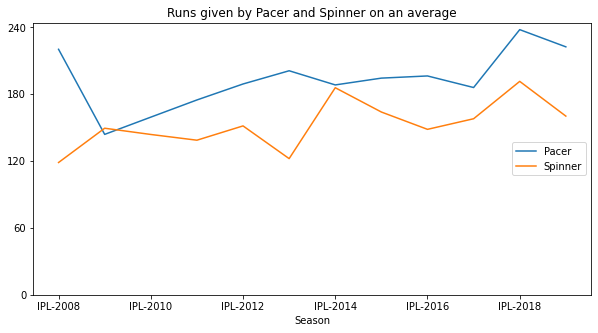

In [167]:

df.plot(figsize=(10,5))
plt.legend(loc='right')
plt.title("Runs given by Pacer and Spinner on an average")
plt.yticks([round(i,1) for i in np.linspace(0,240,5)])

In [107]:
Players.Batting_Hand.unique()

array(['Right_Hand', 'Right_hand', 'Left_Hand', nan], dtype=object)

In [108]:
df

Broader_classification,Pacer,Spinner
Season,,
IPL-2008,220.354839,118.750000
IPL-2009,143.985915,149.512195
IPL-2010,159.460526,143.914894
IPL-2011,174.883117,138.763636
IPL-2012,189.220779,151.596154
IPL-2013,201.097561,122.240000
IPL-2014,188.380952,185.868421
IPL-2015,194.483871,164.055556
IPL-2016,196.435484,148.511111


In [109]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [119]:
total_runs_batsman=pd.DataFrame(deliveries.groupby(["match_id","batsman"]).agg({"batsman_runs":"sum"}))
total_runs_batsman

batsman_runs
match_id batsman                  
1        A Choudhary             6
         BCJ Cutting            16
         CH Gayle               32
         DA Warner              14
         DJ Hooda               16
...                            ...
11415    RD Chahar               0
         RG Sharma              15
         SK Raina                9
         SN Thakur               2
         SR Watson              84

[11262 rows x 1 columns]

In [120]:
total_runs_batsman.reset_index(inplace=True)
total_runs_batsman

,match_id,batsman,batsman_runs
0,1,A Choudhary,6
1,1,BCJ Cutting,16
2,1,CH Gayle,32
3,1,DA Warner,14
4,1,DJ Hooda,16
...,...,...,...
11257,11415,RD Chahar,0
11258,11415,RG Sharma,15
11259,11415,SK Raina,9
11260,11415,SN Thakur,2


In [121]:
total_runs_batsman=pd.merge(total_runs_batsman, match.loc[:,["id","Season"]], left_on='match_id', right_on='id', how='inner')
total_runs_batsman

,match_id,batsman,batsman_runs,id,Season
0,1,A Choudhary,6,1,IPL-2017
1,1,BCJ Cutting,16,1,IPL-2017
2,1,CH Gayle,32,1,IPL-2017
3,1,DA Warner,14,1,IPL-2017
4,1,DJ Hooda,16,1,IPL-2017
...,...,...,...,...,...
11257,11415,RD Chahar,0,11415,IPL-2019
11258,11415,RG Sharma,15,11415,IPL-2019
11259,11415,SK Raina,9,11415,IPL-2019
11260,11415,SN Thakur,2,11415,IPL-2019


In [122]:
total_runs_batsman=pd.merge(total_runs_batsman, Players.loc[:,["Player_Name","Batting_Hand"]], left_on='batsman', right_on='Player_Name', how='inner')
total_runs_batsman

,match_id,batsman,batsman_runs,id,Season,Player_Name,Batting_Hand
0,1,A Choudhary,6,1,IPL-2017,A Choudhary,Right_hand
1,30,A Choudhary,15,30,IPL-2017,A Choudhary,Right_hand
2,42,A Choudhary,4,42,IPL-2017,A Choudhary,Right_hand
3,1,BCJ Cutting,16,1,IPL-2017,BCJ Cutting,Right_Hand
4,10,BCJ Cutting,20,10,IPL-2017,BCJ Cutting,Right_Hand
...,...,...,...,...,...,...,...
11257,11344,S Rutherford,12,11344,IPL-2019,S Rutherford,Left_Hand
11258,11413,S Rutherford,9,11413,IPL-2019,S Rutherford,Left_Hand
11259,11414,S Rutherford,14,11414,IPL-2019,S Rutherford,Left_Hand
11260,11329,P Raj,0,11329,IPL-2019,P Raj,Right_Hand


In [123]:
print(total_runs_batsman.Batting_Hand.unique())
total_runs_batsman.loc[total_runs_batsman["Batting_Hand"]=="Right_hand","Batting_Hand"]="Right_Hand"
total_runs_batsman


['Right_hand' 'Right_Hand' 'Left_Hand']


,match_id,batsman,batsman_runs,id,Season,Player_Name,Batting_Hand
0,1,A Choudhary,6,1,IPL-2017,A Choudhary,Right_Hand
1,30,A Choudhary,15,30,IPL-2017,A Choudhary,Right_Hand
2,42,A Choudhary,4,42,IPL-2017,A Choudhary,Right_Hand
3,1,BCJ Cutting,16,1,IPL-2017,BCJ Cutting,Right_Hand
4,10,BCJ Cutting,20,10,IPL-2017,BCJ Cutting,Right_Hand
...,...,...,...,...,...,...,...
11257,11344,S Rutherford,12,11344,IPL-2019,S Rutherford,Left_Hand
11258,11413,S Rutherford,9,11413,IPL-2019,S Rutherford,Left_Hand
11259,11414,S Rutherford,14,11414,IPL-2019,S Rutherford,Left_Hand
11260,11329,P Raj,0,11329,IPL-2019,P Raj,Right_Hand


In [124]:
total_runs_batsman[total_runs_batsman["Season"]=="IPL-2009"]["Player_Name"].unique().shape

(150,)

In [125]:
total_runs_batsman=total_runs_batsman.groupby(["Season","Batting_Hand"]).agg({"batsman_runs":"sum","Player_Name":"nunique"})


In [126]:
total_runs_batsman.rename(columns={"Player_Name":"CountOfBattingHand"},inplace=True)

In [127]:
Players.size

2830

In [128]:
total_runs_batsman.reset_index(inplace=True)

In [129]:
total_runs_batsman

,Season,Batting_Hand,batsman_runs,CountOfBattingHand
0,IPL-2008,Left_Hand,6980,41
1,IPL-2008,Right_Hand,9829,113
2,IPL-2009,Left_Hand,5636,39
3,IPL-2009,Right_Hand,9740,111
4,IPL-2010,Left_Hand,5669,43
5,IPL-2010,Right_Hand,12085,121
6,IPL-2011,Left_Hand,6962,51
7,IPL-2011,Right_Hand,12915,129
8,IPL-2012,Left_Hand,6388,47
9,IPL-2012,Right_Hand,14934,123


In [130]:
total_runs_batsman["Average_runs"]=total_runs_batsman["batsman_runs"]/total_runs_batsman["CountOfBattingHand"]

In [131]:
total_runs_batsman

,Season,Batting_Hand,batsman_runs,CountOfBattingHand,Average_runs
0,IPL-2008,Left_Hand,6980,41,170.243902
1,IPL-2008,Right_Hand,9829,113,86.982301
2,IPL-2009,Left_Hand,5636,39,144.512821
3,IPL-2009,Right_Hand,9740,111,87.747748
4,IPL-2010,Left_Hand,5669,43,131.837209
5,IPL-2010,Right_Hand,12085,121,99.876033
6,IPL-2011,Left_Hand,6962,51,136.509804
7,IPL-2011,Right_Hand,12915,129,100.116279
8,IPL-2012,Left_Hand,6388,47,135.914894
9,IPL-2012,Right_Hand,14934,123,121.414634


In [132]:
total_runs_batsman[total_runs_batsman["Season"]=="IPL-2008"]

,Season,Batting_Hand,batsman_runs,CountOfBattingHand,Average_runs
0,IPL-2008,Left_Hand,6980,41,170.243902
1,IPL-2008,Right_Hand,9829,113,86.982301


In [151]:
df = total_runs_batsman.pivot(index='Season', columns='Batting_Hand', values='Average_runs')
df.replace(np.NaN,0,inplace=True)
df

Batting_Hand,Left_Hand,Right_Hand
Season,,
IPL-2008,170.243902,86.982301
IPL-2009,144.512821,87.747748
IPL-2010,131.837209,99.876033
IPL-2011,136.509804,100.116279
IPL-2012,135.914894,121.414634
IPL-2013,159.452381,113.769231
IPL-2014,138.918919,133.364583
IPL-2015,132.513514,132.141304
IPL-2016,151.410256,124.309278


([<matplotlib.axis.YTick at 0x7f2e7f351ad0>,
 <a list of 10 Text major ticklabel objects>)

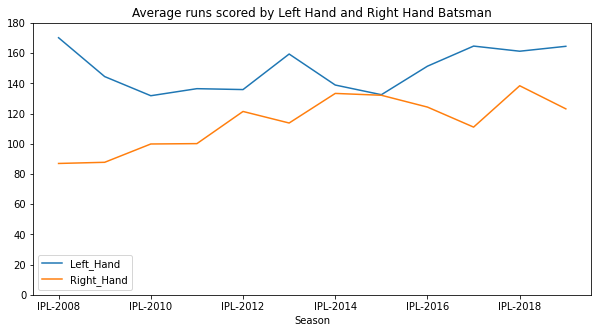

In [152]:

df.plot(figsize=(10,5))
plt.legend()
plt.title("Average runs scored by Left Hand and Right Hand Batsman")
plt.yticks([round(i,1) for i in np.linspace(0,180,10)])

In [136]:
deliveries[deliveries["match_id"]==1].groupby(["match_id","bowler"]).agg({"dismissal_kind":"count"})

dismissal_kind
match_id bowler                      
1        A Choudhary                1
         A Nehra                    2
         B Kumar                    2
         BCJ Cutting                1
         Bipul Sharma               1
         DJ Hooda                   1
         MC Henriques               1
         Rashid Khan                2
         S Aravind                  0
         SR Watson                  0
         STR Binny                  1
         TM Head                    0
         TS Mills                   1
         YS Chahal                  1

In [137]:
Player_dismissed_by_bowler=deliveries.groupby(["match_id","bowler"]).agg({"player_dismissed":"count"})
Player_dismissed_by_bowler.reset_index(inplace=True)

In [138]:
Player_dismissed_by_bowler=pd.merge(Player_dismissed_by_bowler, match.loc[:,["id","Season"]], left_on='match_id', right_on='id', how='inner')
Player_dismissed_by_bowler


,match_id,bowler,player_dismissed,id,Season
0,1,A Choudhary,1,1,IPL-2017
1,1,A Nehra,2,1,IPL-2017
2,1,B Kumar,2,1,IPL-2017
3,1,BCJ Cutting,1,1,IPL-2017
4,1,Bipul Sharma,1,1,IPL-2017
...,...,...,...,...,...
8943,11415,MJ McClenaghan,0,11415,IPL-2019
8944,11415,RA Jadeja,0,11415,IPL-2019
8945,11415,RD Chahar,1,11415,IPL-2019
8946,11415,SL Malinga,2,11415,IPL-2019


In [139]:
Player_dismissed_by_bowler=pd.merge(Player_dismissed_by_bowler, Players.loc[:,["Player_Name","Bowling_Skill"]], left_on='bowler', right_on='Player_Name', how='inner')


In [140]:
Player_dismissed_by_bowler

,match_id,bowler,player_dismissed,id,Season,Player_Name,Bowling_Skill
0,1,A Choudhary,1,1,IPL-2017,A Choudhary,Left-arm fast-medium
1,30,A Choudhary,0,30,IPL-2017,A Choudhary,Left-arm fast-medium
2,37,A Choudhary,1,37,IPL-2017,A Choudhary,Left-arm fast-medium
3,42,A Choudhary,2,42,IPL-2017,A Choudhary,Left-arm fast-medium
4,45,A Choudhary,1,45,IPL-2017,A Choudhary,Left-arm fast-medium
...,...,...,...,...,...,...,...
8943,11344,O Thomas,0,11344,IPL-2019,O Thomas,Right-arm fast
8944,11335,A Roy,1,11335,IPL-2019,A Roy,Slow left-arm orthodox
8945,11338,S Warrier,0,11338,IPL-2019,S Warrier,Right-arm fast-medium
8946,11343,S Warrier,2,11343,IPL-2019,S Warrier,Right-arm fast-medium


In [141]:
def classify(x):
  if "fast" in x or "medium" in x:
    return "Pacer"
  else:
     return "Spinner"
Player_dismissed_by_bowler["Broader_classification"]=Player_dismissed_by_bowler["Bowling_Skill"].apply(lambda x: classify(x))

In [142]:
Player_dismissed_by_bowler

,match_id,bowler,player_dismissed,id,Season,Player_Name,Bowling_Skill,Broader_classification
0,1,A Choudhary,1,1,IPL-2017,A Choudhary,Left-arm fast-medium,Pacer
1,30,A Choudhary,0,30,IPL-2017,A Choudhary,Left-arm fast-medium,Pacer
2,37,A Choudhary,1,37,IPL-2017,A Choudhary,Left-arm fast-medium,Pacer
3,42,A Choudhary,2,42,IPL-2017,A Choudhary,Left-arm fast-medium,Pacer
4,45,A Choudhary,1,45,IPL-2017,A Choudhary,Left-arm fast-medium,Pacer
...,...,...,...,...,...,...,...,...
8943,11344,O Thomas,0,11344,IPL-2019,O Thomas,Right-arm fast,Pacer
8944,11335,A Roy,1,11335,IPL-2019,A Roy,Slow left-arm orthodox,Spinner
8945,11338,S Warrier,0,11338,IPL-2019,S Warrier,Right-arm fast-medium,Pacer
8946,11343,S Warrier,2,11343,IPL-2019,S Warrier,Right-arm fast-medium,Pacer


In [143]:
Player_dismissed_by_bowler=Player_dismissed_by_bowler.groupby(["Season","Broader_classification"]).agg({"player_dismissed":"sum","Player_Name":"nunique"})

In [144]:
Player_dismissed_by_bowler

player_dismissed  Player_Name
Season   Broader_classification                               
IPL-2008 Pacer                                541           62
         Spinner                              149           36
IPL-2009 Pacer                                437           71
         Spinner                              261           41
IPL-2010 Pacer                                463           76
         Spinner                              262           47
IPL-2011 Pacer                                516           77
         Spinner                              294           55
IPL-2012 Pacer                                586           77
         Spinner                              272           52
IPL-2013 Pacer                                663           82
         Spinner                              249           50
IPL-2014 Pacer                                423           63
         Spinner                              251           38
IPL-2015 Pacer                                468           62
         Spinner                              211           36
IPL-2016 Pacer                                458           62
         Spinner                              208           45
IPL-2017 Pacer                                479           67
         Spinner                              232           40
IPL-2018 Pacer                                435           54
         Spinner                              284           41
IPL-2019 Pacer                                400           56
         Spinner                              269           48

In [145]:
Player_dismissed_by_bowler.reset_index(inplace=True)
Player_dismissed_by_bowler

,Season,Broader_classification,player_dismissed,Player_Name
0,IPL-2008,Pacer,541,62
1,IPL-2008,Spinner,149,36
2,IPL-2009,Pacer,437,71
3,IPL-2009,Spinner,261,41
4,IPL-2010,Pacer,463,76
5,IPL-2010,Spinner,262,47
6,IPL-2011,Pacer,516,77
7,IPL-2011,Spinner,294,55
8,IPL-2012,Pacer,586,77
9,IPL-2012,Spinner,272,52


In [146]:
Player_dismissed_by_bowler["Average_Player_dismissed"]=Player_dismissed_by_bowler["player_dismissed"]/Player_dismissed_by_bowler["Player_Name"]

In [147]:
Player_dismissed_by_bowler

,Season,Broader_classification,player_dismissed,Player_Name,Average_Player_dismissed
0,IPL-2008,Pacer,541,62,8.725806
1,IPL-2008,Spinner,149,36,4.138889
2,IPL-2009,Pacer,437,71,6.154930
3,IPL-2009,Spinner,261,41,6.365854
4,IPL-2010,Pacer,463,76,6.092105
5,IPL-2010,Spinner,262,47,5.574468
6,IPL-2011,Pacer,516,77,6.701299
7,IPL-2011,Spinner,294,55,5.345455
8,IPL-2012,Pacer,586,77,7.610390
9,IPL-2012,Spinner,272,52,5.230769


In [169]:
df = Player_dismissed_by_bowler.pivot(index='Season', columns='Broader_classification', values='Average_Player_dismissed')
df.replace(np.NaN,0,inplace=True)
df

Broader_classification,Pacer,Spinner
Season,,
IPL-2008,8.725806,4.138889
IPL-2009,6.154930,6.365854
IPL-2010,6.092105,5.574468
IPL-2011,6.701299,5.345455
IPL-2012,7.610390,5.230769
IPL-2013,8.085366,4.980000
IPL-2014,6.714286,6.605263
IPL-2015,7.548387,5.861111
IPL-2016,7.387097,4.622222


([<matplotlib.axis.YTick at 0x7f2e7e89fcd0>,
 <a list of 12 Text major ticklabel objects>)

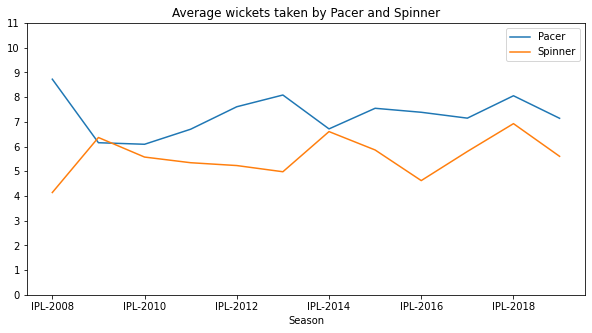

In [178]:
df.plot(figsize=(10,5))
plt.legend()
plt.title("Average wickets taken by Pacer and Spinner")
plt.yticks([round(i,1) for i in np.linspace(0,11,12)])